# ANALYTICS IN RETAIL

### A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.

## Create a report and display the below calculated metrics, reports and inferences.


## 1.  Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [1]:
import os
os.getcwd()

'C:\\Users\\somjit.das\\AnalytixLabs\\Solved Assignments'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
%matplotlib inline
import scipy.stats as stats

In [3]:
filepath = ('F:/AnalytixLabs/Case Study 1 Retail/')
Customer = pd.read_csv(filepath + 'Customer.csv')
Transaction = pd.read_csv(filepath + 'Transactions.csv')
Product_Heirarchy = pd.read_csv(filepath + 'prod_cat_info.csv')

In [4]:
Customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [5]:
Transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [6]:
Product_Heirarchy.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [7]:
# renaming "prod_sub_cat_code" column in 'prod_info' table to make it similar to 'transaction' table
# to merge the both the tables easily
Product_Heirarchy.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
Product_Heirarchy.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [8]:
# Stepl merge Product_Heirarchy & Transaction
Product_H_Transaction = pd.merge(left = Transaction, right = Product_Heirarchy, on = ['prod_cat_code','prod_subcat_code'],how ='left')
Product_H_Transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [9]:
# Step2 merge Product_H_Transaction & Customers
Customer_Final = pd.merge(left=Product_H_Transaction, right=Customer,right_on="customer_Id", left_on="cust_id", how="left")
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [10]:
Customer_Final.shape

(23053, 16)

In [11]:
Transaction.shape

(23053, 10)

In [12]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

## 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [13]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [14]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

### b. Top/Bottom 10 observations

In [15]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [16]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [17]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


### d. Frequency tables for all the categorical variables

In [18]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [19]:
Customer_Final.loc[:,Customer_Final.dtypes =='object'].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,17-09-1982,M
freq,35,9311,6069,3048,32,11811


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

### continuous variables


In [20]:
Continuous_Customer_Final =Customer_Final.loc[:,['prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt']]
Continuous_Customer_Final.head(2)

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,5,3,-5,-1497,785.925,-8270.925


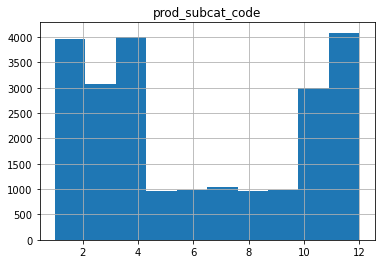

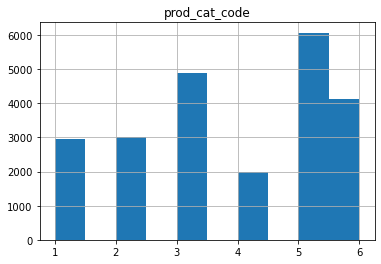

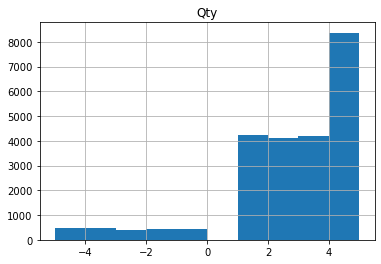

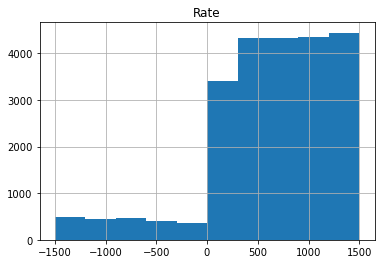

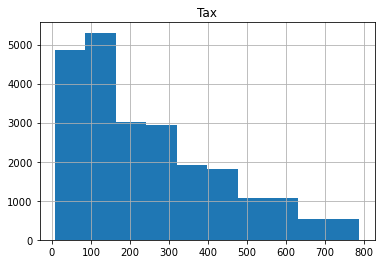

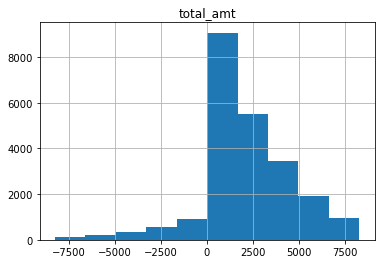

In [21]:
for count in Continuous_Customer_Final.columns:
    Continuous_Customer_Final[count].hist()
    plt.title(count)
    plt.show()

### categorical variables

In [22]:
Categorical_Customer_Final =Customer_Final.loc[:,Customer_Final.dtypes == 'object']
Categorical_Customer_Final.head(2)

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
0,28-02-2014,e-Shop,Clothing,Women,26-09-1981,M
1,27-02-2014,e-Shop,Electronics,Computers,11-05-1973,F


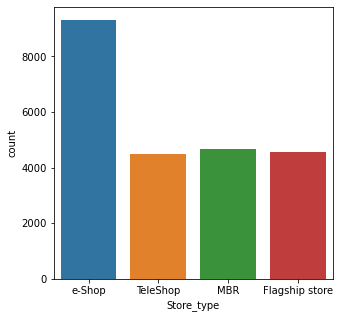

In [23]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Store_type", data=Categorical_Customer_Final)
#ax = sns.countplot(x="Store_type", data=Categorical_Customer_Final, hue = 'Gender'), explore the magic hue
plt.show()

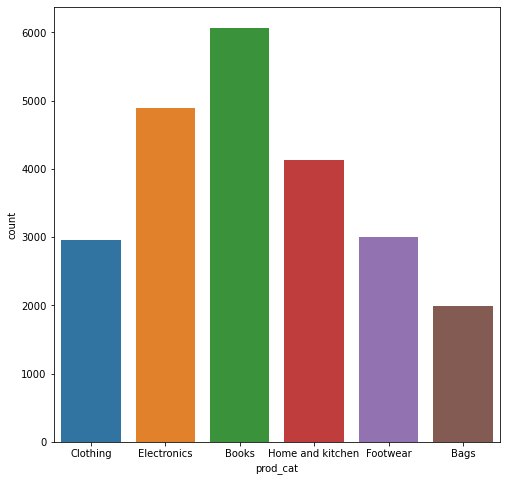

In [24]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="prod_cat", data=Categorical_Customer_Final)
plt.show()

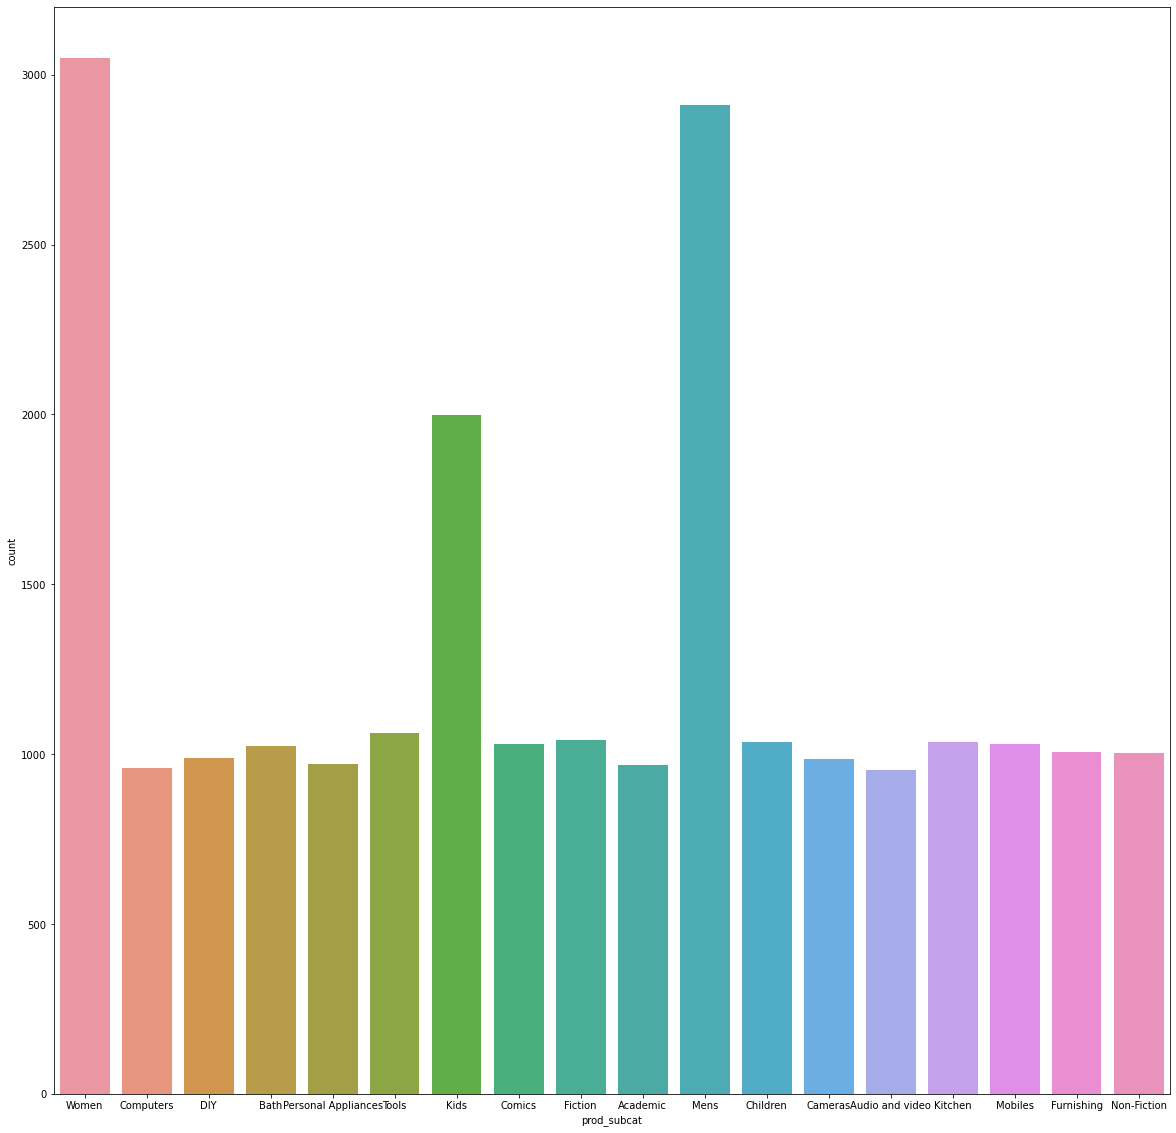

In [25]:
plt.figure(figsize= (20,20) )
ax =sns.countplot(x="prod_subcat", data=Categorical_Customer_Final )
plt.show()

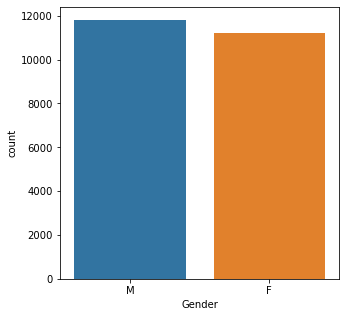

In [26]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Gender", data=Categorical_Customer_Final)

#ax = sns.countplot(x="Store_type", data=Categorical_Customer_Final, hue = 'Gender'), explore the magic hue
plt.show()

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

#### Check duplicates

In [27]:
Customer_Final.duplicated().sum()

13

#### Drop Duplicates

In [28]:
Customer_Final.drop_duplicates(inplace =True)

In [29]:
Customer_Final.duplicated().sum()

0

In [30]:
Customer_Final.sort_values(by="tran_date").head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
16050,47933752822,270192,1/1/2012,3,1,4,215,90.300,950.300,e-Shop,Clothing,Kids,270192,01-06-1987,F,4.0
16052,35798683065,271913,1/1/2012,1,1,1,229,24.045,253.045,MBR,Clothing,Women,271913,15-10-1985,F,2.0


In [31]:
max_date = Customer_Final['tran_date'].max()
max_date

'9/9/2013'

In [32]:
min_date = Customer_Final['tran_date'].min()
min_date

'1/1/2012'

In [33]:
timeperiod = pd.to_datetime(max_date, format = '%d/%m/%Y') - pd.to_datetime(min_date, format = '%d/%m/%Y')
timeperiod.days

617

### b. Count of transactions where the total amount of transaction was negative

In [34]:
Customer_Final.loc[Customer_Final['total_amt']<0,'transaction_id'].count()

2164

## 5. Analyze which product categories are more popular among females vs male customers.

In [35]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [36]:
#method 1
Popular_Product_Categories_Grupby=Customer_Final.groupby(['prod_cat','Gender']).Qty.sum().reset_index()
Popular_Product_Categories_Grupby

,prod_cat,Gender,Qty
0,Bags,F,2364
1,Bags,M,2346
2,Books,F,7080
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6486
8,Footwear,F,3721
9,Footwear,M,3561


In [37]:
#.pivot() is used to create cross tables on top of summarized data
Popular_Product_Categories_Grupby.pivot(index = 'prod_cat',columns = 'Gender', values = 'Qty').reset_index()

Gender,prod_cat,F,M
0,Bags,2364,2346
1,Books,7080,7587
2,Clothing,3425,3748
3,Electronics,5832,6486
4,Footwear,3721,3561
5,Home and kitchen,4898,5051


In [38]:
#method 2
Customer_Final.pivot_table( index = 'prod_cat', columns = 'Gender', values = 'Qty', aggfunc = 'sum' ).reset_index()

Gender,prod_cat,F,M
0,Bags,2364,2346
1,Books,7080,7587
2,Clothing,3425,3748
3,Electronics,5832,6486
4,Footwear,3721,3561
5,Home and kitchen,4898,5051


In [39]:
#method 3
pd.crosstab(index = Customer_Final.prod_cat, columns = Customer_Final.Gender, values = Customer_Final.Qty, aggfunc = 'sum').reset_index()

Gender,prod_cat,F,M
0,Bags,2364,2346
1,Books,7080,7587
2,Clothing,3425,3748
3,Electronics,5832,6486
4,Footwear,3721,3561
5,Home and kitchen,4898,5051


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [40]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [41]:
City_code_Customers=Customer_Final.groupby('city_code').customer_Id.count().sort_values(ascending = False).reset_index()
City_code_Customers ['%_Customers_City'] = (City_code_Customers.customer_Id / City_code_Customers.customer_Id.sum())*100
City_code_Customers

,city_code,customer_Id,%_Customers_City
0,4.0,2422,10.515804
1,3.0,2410,10.463703
2,5.0,2357,10.233588
3,7.0,2356,10.229246
4,10.0,2333,10.129385
5,8.0,2328,10.107676
6,2.0,2268,9.847169
7,1.0,2255,9.790726
8,9.0,2176,9.447725
9,6.0,2127,9.234977


## 7. Which store type sells the maximum products by value and by quantity?

In [42]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [43]:
DF1 = Customer_Final
DF1['Value'] = DF1['Qty'] * DF1['Rate']

In [44]:
DF1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0,7485


In [45]:
DF1[['Qty','Value']].groupby(DF1['Store_type']).agg(['sum','max']).sort_values(by = 'Store_type',ascending =False).reset_index()

Store_type    Qty         Value      
                     sum max       sum   max
0          e-Shop  22790   5  22197825  7500
1        TeleShop  10993   5  10438103  7500
2             MBR  11195   5  10988355  7500
3  Flagship store  11142   5  10942663  7470

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [46]:
DF1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0,7485


In [47]:
#method1
DF1.groupby(['Store_type','prod_cat']).total_amt.sum()

Store_type      prod_cat        
Flagship store  Bags                 870548.835
                Books               2493677.810
                Clothing            1194423.230
                Electronics         2215136.040
                Footwear            1234806.560
                Home and kitchen    1713004.150
MBR             Bags                 848678.675
                Books               2496039.195
                Clothing            1287686.335
                Electronics         2107969.825
                Footwear            1112163.715
                Home and kitchen    1822403.570
TeleShop        Bags                 789181.055
                Books               2545714.470
                Clothing            1241834.360
                Electronics         1978457.195
                Footwear            1235719.290
                Home and kitchen    1581227.375
e-Shop          Bags                1617933.265
                Books               5297161.155
       

In [48]:
#method 2
DF2=DF1.pivot_table(index = 'Store_type',columns = 'prod_cat', values ='total_amt' ,aggfunc='sum')
DF2.head(2)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.835,2493677.810,1194423.230,2215136.040,1234806.560,1713004.15
MBR,848678.675,2496039.195,1287686.335,2107969.825,1112163.715,1822403.57


In [49]:
DF2.loc['Flagship store',['Clothing','Electronics']].reset_index()

,prod_cat,Flagship store
0,Clothing,1194423.23
1,Electronics,2215136.04


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [50]:
DF1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0,7485


In [51]:
#method1
DF3=DF1.groupby(['prod_cat','Gender']).total_amt.sum().reset_index()
DF3

,prod_cat,Gender,total_amt
0,Bags,F,2079618.840
1,Bags,M,2046722.990
2,Books,F,6174590.825
3,Books,M,6645972.775
4,Clothing,F,3026750.805
5,Clothing,M,3224079.495
6,Electronics,F,5019354.210
7,Electronics,M,5711351.620
8,Footwear,F,3203155.215
9,Footwear,M,3020200.365


In [52]:
DF3[(DF3['prod_cat']=='Electronics')&(DF3['Gender']=='M')]

,prod_cat,Gender,total_amt
7,Electronics,M,5711351.62


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [53]:
DF1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0,7485


In [54]:
#Step 1 - remove all negative transactions
DF_trans=DF1.loc[DF1.total_amt>0].sort_values( by = 'cust_id' , ascending = False, ignore_index = True )
DF_trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,24113900219,275265,3/4/2013,2,6,3,719,226.485,2383.485,Flagship store,Home and kitchen,Furnishing,275265,01-01-1990,M,3.0,2157
1,38961184788,275265,26-12-2011,12,5,3,188,59.220,623.220,e-Shop,Books,Academic,275265,01-01-1990,M,3.0,564


In [55]:
#Step 2 - Use groupby to count of unique transaction_id  & more than 10 unique values
DF_unique=DF_trans.groupby(['cust_id','prod_cat','prod_subcat']).transaction_id.count().reset_index()
DF_Final = DF_unique.groupby('cust_id').transaction_id.count().reset_index()
DF_Final[DF_Final['transaction_id']>10]

,cust_id,transaction_id


## 11. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [56]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0,7485


In [57]:
#experiment
s2 = pd.Series(Customer_Final['DOB'])
s2

0        26-09-1981
1        11-05-1973
2        27-07-1992
3        08-06-1981
4        27-07-1992
            ...    
23048    21-02-1972
23049    27-04-1984
23050    20-06-1976
23051    22-05-1970
23052    15-01-1982
Name: DOB, Length: 23040, dtype: object

In [58]:
#convert column to date time
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])

In [59]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,3860
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,7485


In [60]:
#Current Time
pd.Timestamp.now()

Timestamp('2021-08-04 21:15:06.775962')

In [61]:
#Currentt Age calcualtion
Customer_Final['Age'] =pd.Timestamp.now().year - Customer_Final['DOB'].dt.year

In [62]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value,Age
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,3860,40
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,7485,48


In [63]:
Customer_Final['Age'].max()

51

In [64]:
Customer_Final['Age'].min()

29

### All Customers aged between 25 - 35

In [65]:
Customer_Final_25_35 = Customer_Final[ (Customer_Final['Age']>=25) & (Customer_Final['Age']<=35) ]

In [66]:
Customer_Final_25_35.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value,Age
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,1582,29
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,1582,29


In [67]:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
Customer_Final_25_35_SG=Customer_Final_25_35.groupby(['prod_cat'])['total_amt' ].sum().reset_index()
Customer_Final_25_35_SG

,prod_cat,total_amt
0,Bags,1211316.470
1,Books,3696676.945
2,Clothing,2095425.865
3,Electronics,3345573.140
4,Footwear,1979197.545
5,Home and kitchen,2610812.230


In [68]:
Customer_Final_25_35_SG[Customer_Final_25_35_SG.prod_cat.isin(['Electronics','Books'])].reset_index()


,index,prod_cat,total_amt
0,1,Books,3696676.945
1,3,Electronics,3345573.140


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [69]:
Customer_Final_25_35.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Value,Age
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,1582,29
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,1582,29


In [70]:
Customer_Final_25_35_SG2=Customer_Final_25_35.groupby(['prod_cat','tran_date'])['total_amt' ].sum().reset_index()
Customer_Final_25_35_SG2['tran_date'] =pd.to_datetime(Customer_Final_25_35_SG2['tran_date'])
Customer_Final_25_35_SG2

,prod_cat,tran_date,total_amt
0,Bags,2011-01-10,2371.330
1,Bags,2013-01-11,3865.290
2,Bags,2012-01-12,4057.560
3,Bags,2013-01-12,7478.640
4,Bags,2011-01-02,-1213.290
...,...,...,...
4235,Home and kitchen,2013-09-06,8657.675
4236,Home and kitchen,2011-09-07,4488.510
4237,Home and kitchen,2013-09-07,161.330
4238,Home and kitchen,2012-09-08,9461.010


In [71]:
#filter 1st Jan, 2014 to 1st Mar, 2014
Total_Amount_Spent=Customer_Final_25_35_SG2[(Customer_Final_25_35_SG2.tran_date>='2014-01-01')&(Customer_Final_25_35_SG2.tran_date<= '2014-03-01')].reset_index()
Total_Amount_Spent

,index,prod_cat,tran_date,total_amt
0,54,Bags,2014-01-13,1284.010
1,56,Bags,2014-02-13,2917.200
2,66,Bags,2014-01-14,8308.495
3,68,Bags,2014-02-14,1867.450
4,80,Bags,2014-01-15,-638.690
...,...,...,...,...
128,3988,Home and kitchen,2014-01-28,6574.750
129,4010,Home and kitchen,2014-01-29,-1359.150
130,4038,Home and kitchen,2014-03-01,-608.855
131,4060,Home and kitchen,2014-01-30,2966.925


In [72]:
Total_Amount_Spent.loc[:,'total_amt'].sum()

495898.5850000001